<a href="https://colab.research.google.com/github/DeepakRamana/machineLearning/blob/main/New_Week_3_Additional_Case_Study_Tips_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Python - Foundations</center></font></h1>
<h1><center>Python for Visualization - Assignment</center></h1>


### **Context**
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### **Objective**
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. <br>
<br>
The dataset consists of the following features:
*   order_id: Unique ID of the order
*   customer_id: ID of the customer who ordered the food
*   restaurant_name: Name of the restaurant
*   cuisine_type: Cuisine ordered by the customer
*   cost: Cost of the order
*   day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
*   rating: Rating given by the customer out of 5
*   food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
*   delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information
















Let us first import the necessary libraries before starting our analysis.

### **Mounting the Drive for data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the libraries**

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

Let us now load the dataset.

### **Loading the dataset**

In [3]:
foodHub = pd.read_csv("/content/drive/MyDrive/resources/csv/foodhub_order.csv")

### **Overview of the dataset**

The initial steps to get an overview of the dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### **Displaying the first 5 rows of the dataset**

In [4]:
foodHub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


We could see a set of rows with Rating as `Not given`, we should take them out as they wont be giving us any data insights.

### **Sanitize the dataset**

In [5]:
foodHubUpt = pd.read_csv("/content/drive/MyDrive/resources/csv/foodhub_order.csv", na_values=['Not given'])

In [6]:
foodHubUpt.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


- *The dataset contains food delivery information about the customer orders, split by various cuisines*
- *Customers leave a rating occasionally which would be an outcome of one of the following.*
1.   Cost of the order
2.   Food preparation and delivery time

#### **Understanding the shape of the dataset**

In [7]:
foodHub.shape

(1898, 9)

# Without Rating provided for a restaurant
The dataset with empty Rating value accounts to around 1898 rows, there is no significant measure here to analyse if the rating is empty. Having said that, we could derive a lot of details with the empty ratings data with respect to the following metrics

1.   Average preparation time during weekdays and weekends
2.   Total number of orders on weekdays and weekends


# With Rating provided for a restaurant
Rating gives a significant measure for assessing the performance of the restaurant around various dimensions
*   Cost of the food
*   Quality of the food
*   Time taken to preapre the food
*   Availability of the restaurant









In [ ]:
foodHubUpt.shape

(1162, 8)

#### **Checking the data types of the columns for the dataset**

We need to note one key difference in the dataframes
1. Data With ratings --> dType of rating is `int34`
2. Data Without and with ratings (mix of both) --> dType of rating column is object.

In [8]:
foodHub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [14]:
foodHubUpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            1898 non-null   int64  
 1   restaurant_name        1898 non-null   object 
 2   cuisine_type           1898 non-null   object 
 3   cost_of_the_order      1898 non-null   float64
 4   day_of_the_week        1898 non-null   object 
 5   rating                 1162 non-null   float64
 6   food_preparation_time  1898 non-null   int64  
 7   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 118.8+ KB


In [17]:
foodHub['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [19]:
foodHubUpt['rating'].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [20]:
foodHubUpt['rating'].isna().sum() + foodHubUpt['rating'].count()

1898

In [11]:
#removing order id as it's unique
foodHub.drop('order_id', axis=1, inplace=True)
foodHubUpt.drop('order_id', axis=1, inplace=True)

In [12]:
foodHub.head()

,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [13]:
foodHubUpt.head()

,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [ ]:
foodHubUpt.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,1162.0,171939.471601,114551.215031,5139.00,77540.00,128655.5,276066.25,403019.00
cost_of_the_order,1162.0,16.760766,7.572578,4.47,12.13,14.6,22.75,35.41
rating,1162.0,4.344234,0.741478,3.00,4.00,5.0,5.00,5.00
food_preparation_time,1162.0,27.381239,4.677922,20.00,23.00,27.0,32.00,35.00
delivery_time,1162.0,24.154045,4.930999,15.00,20.00,25.0,28.00,33.00


In [ ]:
foodHubUpt['customer_id'].nunique()

859

In [ ]:
foodHubUpt['restaurant_name'].nunique()

156

In [ ]:
foodHubUpt['cuisine_type'].nunique()

14

- *There are 156 restaurants and 14 different cuisines overall*

The primary difference between categorical and object type columns is that categorical columns help to improve the processing speed and reduces the storage space when we are working with a large dataset.

Let us drop the `customer_id` column from our dataset as it will not add any value to our analysis since it is an  unique identifier.

Let's print the head of the dataset to verify that the `order_id` column has been successfully dropped.

In [ ]:
foodHubUpt.groupby('cuisine_type').aggregate({'restaurant_name':'count','rating':['min','max','mean','std'],'food_preparation_time':['min','max','mean','std']})

restaurant_name rating                           \
                         count    min  max      mean       std   
cuisine_type                                                     
American                   368    3.0  5.0  4.298913  0.747602   
Chinese                    133    3.0  5.0  4.338346  0.767594   
French                      10    3.0  5.0  4.300000  0.823273   
Indian                      50    3.0  5.0  4.540000  0.676425   
Italian                    172    3.0  5.0  4.360465  0.747906   
Japanese                   273    3.0  5.0  4.373626  0.727329   
Korean                       9    3.0  5.0  4.111111  0.781736   
Mediterranean               32    3.0  5.0  4.218750  0.870090   
Mexican                     48    3.0  5.0  4.416667  0.709610   
Middle Eastern              34    3.0  5.0  4.235294  0.698866   
Southern                    13    3.0  5.0  4.307692  0.630425   
Spanish                      6    4.0  5.0  4.833333  0.408248   
Thai                         9    4.0  5.0  4.666667  0.500000   
Vietnamese                   5    3.0  5.0  4.000000  1.000000   

               food_preparation_time                           
                                 min max       mean       std  
cuisine_type                                                   
American                          20  35  27.388587  4.649993  
Chinese                           20  35  27.977444  4.755326  
French                            21  35  26.600000  4.526465  
Indian                            20  35  26.280000  4.426451  
Italian                           20  35  27.627907  4.693025  
Japanese                          20  35  27.652015  4.686472  
Korean                            20  33  25.333333  3.968627  
Mediterranean                     21  35  27.875000  4.844352  
Mexican                           21  35  25.854167  4.570905  
Middle Eastern                    20  34  26.676471  4.139394  
Southern                          20  35  27.153846  5.413658  
Spanish                           21  30  25.333333  3.326660  
Thai                              21  35  26.888889  5.925463  
Vietnamese                        20  33  24.200000  5.357238

In [ ]:
foodHubUpt.groupby('customer_id').aggregate({'rating':['min','max','mean','std']})

rating               
               min  max mean  std
customer_id                      
5139           5.0  5.0  5.0  NaN
5444           3.0  3.0  3.0  NaN
6987           4.0  4.0  4.0  NaN
14869          4.0  4.0  4.0  0.0
18902          4.0  4.0  4.0  NaN
...            ...  ...  ...  ...
399832         5.0  5.0  5.0  NaN
400390         4.0  4.0  4.0  NaN
400950         5.0  5.0  5.0  NaN
402215         4.0  4.0  4.0  NaN
403019         5.0  5.0  5.0  NaN

[859 rows x 4 columns]

#### **Getting the statistical summary for the dataset**

In [ ]:
foodHubUpt.describe()

,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000
mean,171939.471601,16.760766,4.344234,27.381239,24.154045
std,114551.215031,7.572578,0.741478,4.677922,4.930999
min,5139.000000,4.470000,3.000000,20.000000,15.000000
25%,77540.000000,12.130000,4.000000,23.000000,20.000000
50%,128655.500000,14.600000,5.000000,27.000000,25.000000
75%,276066.250000,22.750000,5.000000,32.000000,28.000000
max,403019.000000,35.410000,5.000000,35.000000,33.000000


In [ ]:
foodHubUpt.isnull().sum()

customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
foodHubUpt.groupby(['cuisine_type','day_of_the_week']).aggregate({'restaurant_name':'count','rating':['min','max','mean','std'],'food_preparation_time':['min','max','mean','std']})

restaurant_name rating                 \
                                         count    min  max      mean   
cuisine_type   day_of_the_week                                         
American       Weekday                     111    3.0  5.0  4.252252   
               Weekend                     257    3.0  5.0  4.319066   
Chinese        Weekday                      26    3.0  5.0  4.230769   
               Weekend                     107    3.0  5.0  4.364486   
French         Weekday                       2    4.0  5.0  4.500000   
               Weekend                       8    3.0  5.0  4.250000   
Indian         Weekday                      14    3.0  5.0  4.428571   
               Weekend                      36    3.0  5.0  4.583333   
Italian        Weekday                      62    3.0  5.0  4.403226   
               Weekend                     110    3.0  5.0  4.336364   
Japanese       Weekday                      74    3.0  5.0  4.364865   
               Weekend                     199    3.0  5.0  4.376884   
Korean         Weekday                       2    4.0  5.0  4.500000   
               Weekend                       7    3.0  5.0  4.000000   
Mediterranean  Weekday                      11    3.0  5.0  4.000000   
               Weekend                      21    3.0  5.0  4.333333   
Mexican        Weekday                      16    3.0  5.0  4.375000   
               Weekend                      32    3.0  5.0  4.437500   
Middle Eastern Weekday                      15    3.0  5.0  4.466667   
               Weekend                      19    3.0  5.0  4.052632   
Southern       Weekday                       4    3.0  5.0  4.000000   
               Weekend                       9    4.0  5.0  4.444444   
Spanish        Weekend                       6    4.0  5.0  4.833333   
Thai           Weekday                       1    4.0  4.0  4.000000   
               Weekend                       8    4.0  5.0  4.750000   
Vietnamese     Weekday                       2    3.0  3.0  3.000000   
               Weekend                       3    4.0  5.0  4.666667   

                                         food_preparation_time                 \
                                     std                   min max       mean   
cuisine_type   day_of_the_week                                                  
American       Weekday          0.756409                    20  35  27.666667   
               Weekend          0.744345                    20  35  27.268482   
Chinese        Weekday          0.815239                    21  35  29.461538   
               Weekend          0.757261                    20  35  27.616822   
French         Weekday          0.707107                    21  31  26.000000   
               Weekend          0.886405                    21  35  26.750000   
Indian         Weekday          0.851631                    20  33  25.500000   
               Weekend          0.603561                    20  35  26.583333   
Italian        Weekday          0.734617                    20  35  27.467742   
               Weekend          0.757559                    20  35  27.718182   
Japanese       Weekday          0.768816                    20  35  27.283784   
               Weekend          0.713271                    20  35  27.788945   
Korean         Weekday          0.707107                    20  26  23.000000   
               Weekend          0.816497                    21  33  26.000000   
Mediterranean  Weekday          0.894427                    21  33  25.636364   
               Weekend          0.856349                    21  35  29.047619   
Mexican        Weekday          0.806226                    21  34  25.312500   
               Weekend          0.669015                    21  35  26.125000   
Middle Eastern Weekday          0.639940                    20  34  26.933333   
               Weekend          0.705036                    20  33  26.473684   
Souther

- *The bill amount ranges from around 3 dollars to 50 dollars while the average bill amount is around 20 dollars. Half of the bill amounts are less than 18 dollars which indicate that most of the orders are not very costly.*
- *The tip amount ranges from around 1 dollar to 10 dollars. The mean and median of the tip amounts are very close to each other (~3 dollars).*
- *The group size varies from 1 person to 6 people.*

### **Now we have got a preliminary idea about the dataset. Let us now see the distribution of each of the columns to get a better understanding. Let us start with the numerical columns and use the histplot and boxplot to plot their distribution.**

#### **Understanding the distribution of `total_bill`**

In [ ]:
foodHubUpt.rating.value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

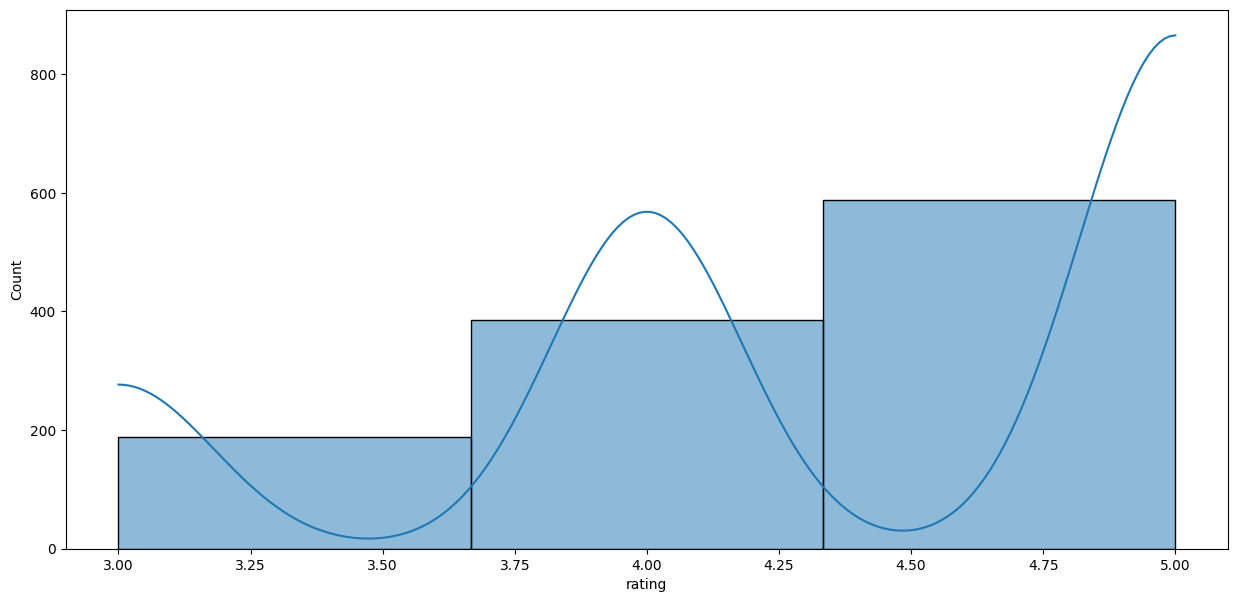

In [ ]:
plt.figure(figsize=(15, 7))
sns.histplot(data=foodHubUpt, x='rating', bins=3, kde=True);

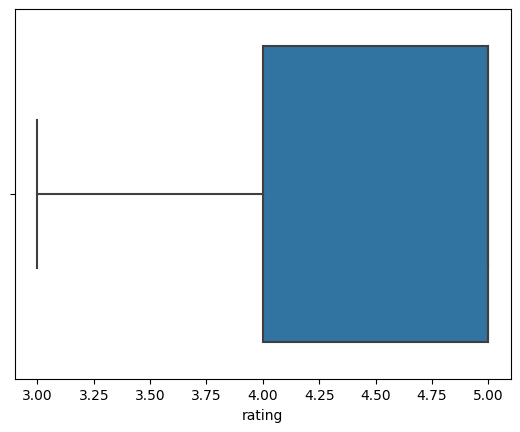

In [ ]:
sns.boxplot(data = foodHubUpt, x = 'rating');

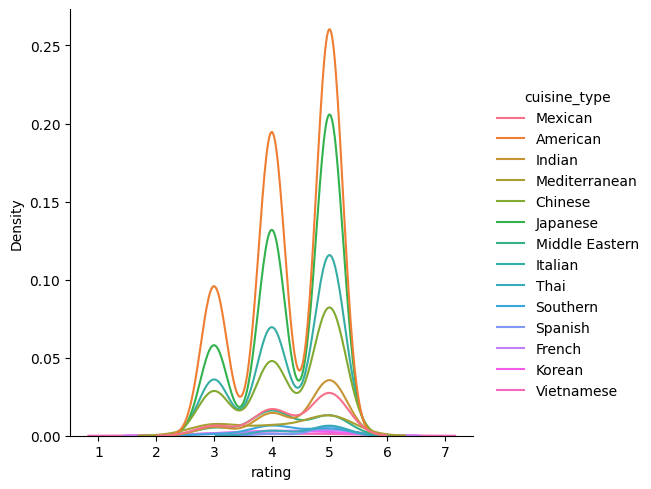

In [ ]:
sns.displot(data=foodHubUpt, x='rating', kind= 'kde', hue= 'cuisine_type');

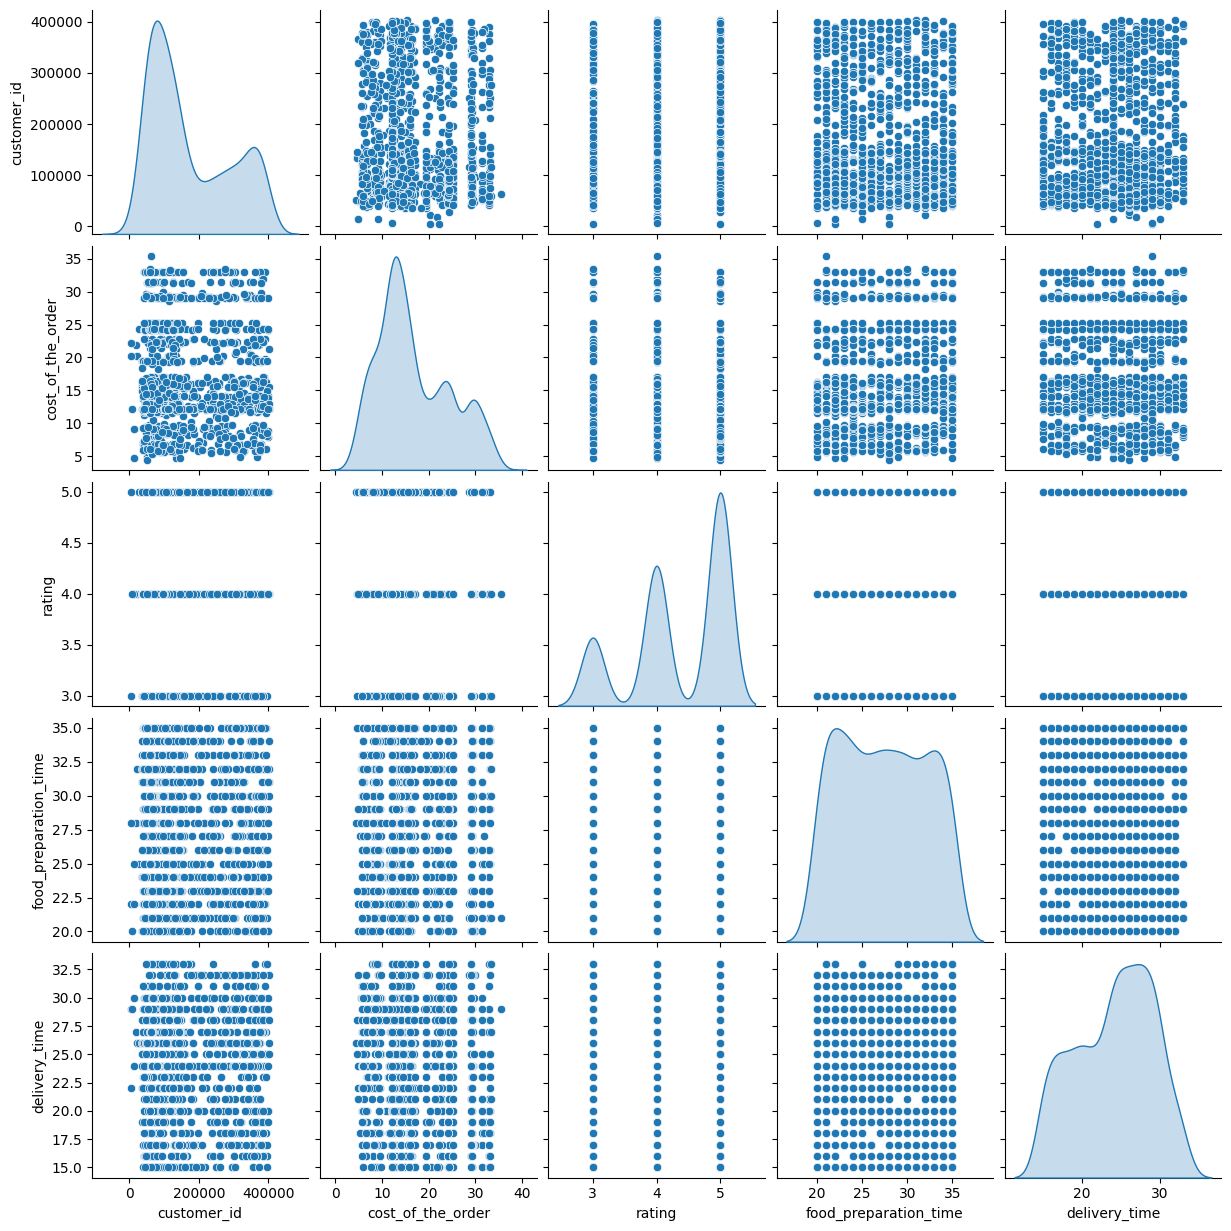

In [ ]:
sns.pairplot(foodHubUpt, diag_kind="kde");

- *The `total_bill` column is slightly right-skewed.*
- *Almost half of the customers pay less than 18 dollars for overall bill.*
- *50% of the billing amounts lie between 12 to 25 dollars.*


#### **Understanding the distribution of `tip`**

In [ ]:
correlation = foodHubUpt.corr() # creating a 2-D Matrix with correlation plots
correlation

<ipython-input-48-42e0f4062b94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = foodHubUpt.corr() # creating a 2-D Matrix with correlation plots


,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
customer_id,1.000000,-0.002110,0.007753,-0.035754,-0.009076
cost_of_the_order,-0.002110,1.000000,0.033983,0.035445,-0.075892
rating,0.007753,0.033983,1.000000,-0.006083,-0.009804
food_preparation_time,-0.035754,0.035445,-0.006083,1.000000,-0.008635
delivery_time,-0.009076,-0.075892,-0.009804,-0.008635,1.000000


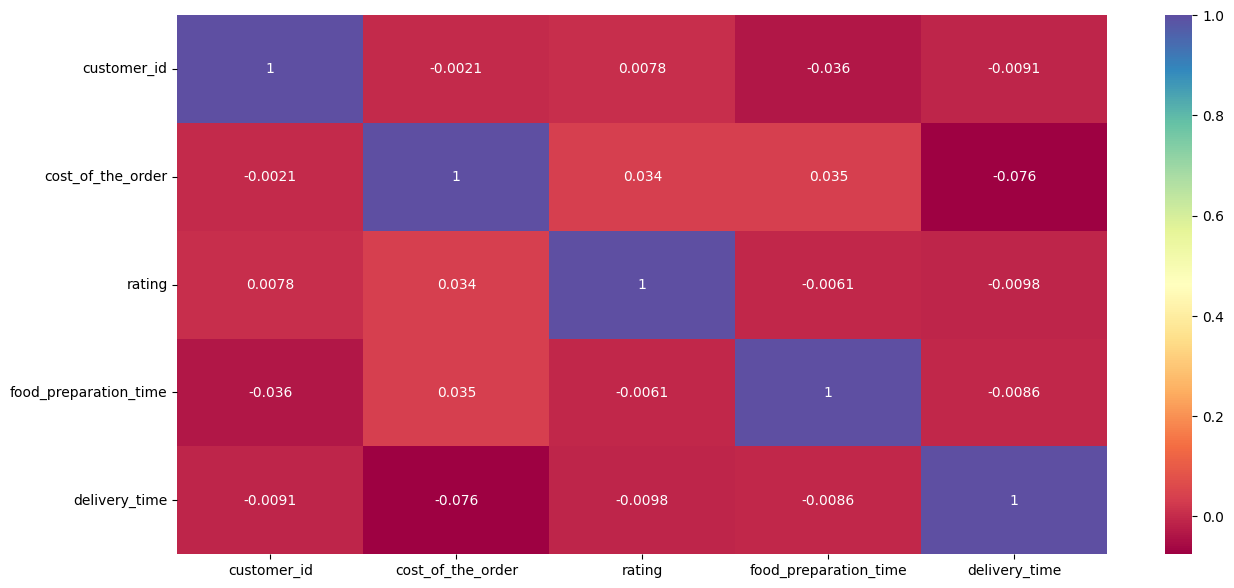

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, cmap="Spectral");

In [ ]:
from operator import index
gradeCuisineByRating = foodHubUpt.groupby('cuisine_type')[['food_preparation_time', 'delivery_time']].sum().mean()[['rating', 'food_preparation_time', 'delivery_time', 'cost_of_the_order']].reset_index();
gradeCuisineByRating.dtypes

<ipython-input-84-700028c3304b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gradeCuisineByRating = foodHubUpt.groupby('cuisine_type').mean()[['rating', 'food_preparation_time', 'delivery_time', 'cost_of_the_order']].reset_index();


cuisine_type              object
rating                   float64
food_preparation_time    float64
delivery_time            float64
cost_of_the_order        float64
dtype: object

<Figure size 2000x600 with 0 Axes>

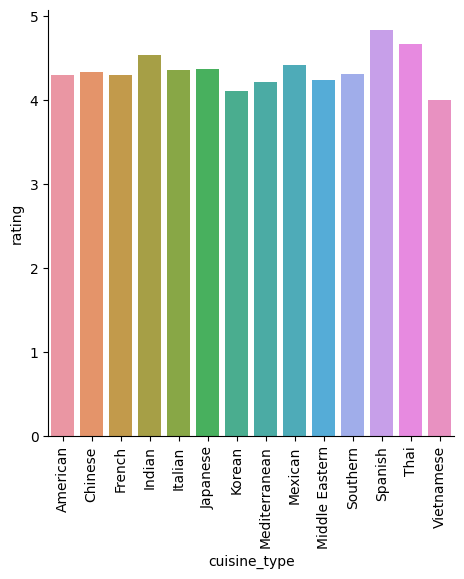

In [ ]:
plt.figure(figsize=(20,6))
sns.catplot(data=gradeCuisineByRating, x='cuisine_type', y='rating', kind='bar')
plt.xticks(rotation=90);

<Figure size 2000x600 with 0 Axes>

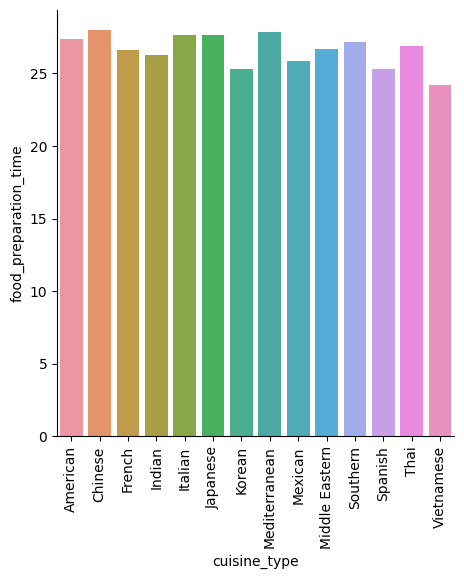

In [ ]:
plt.figure(figsize=(20,6));
sns.catplot(data=gradeCuisineByRating, x='cuisine_type', y='food_preparation_time', kind='bar');
plt.xticks(rotation=90);

<ipython-input-79-e8a3c038de60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationRating = gradeCuisineByRating.corr()


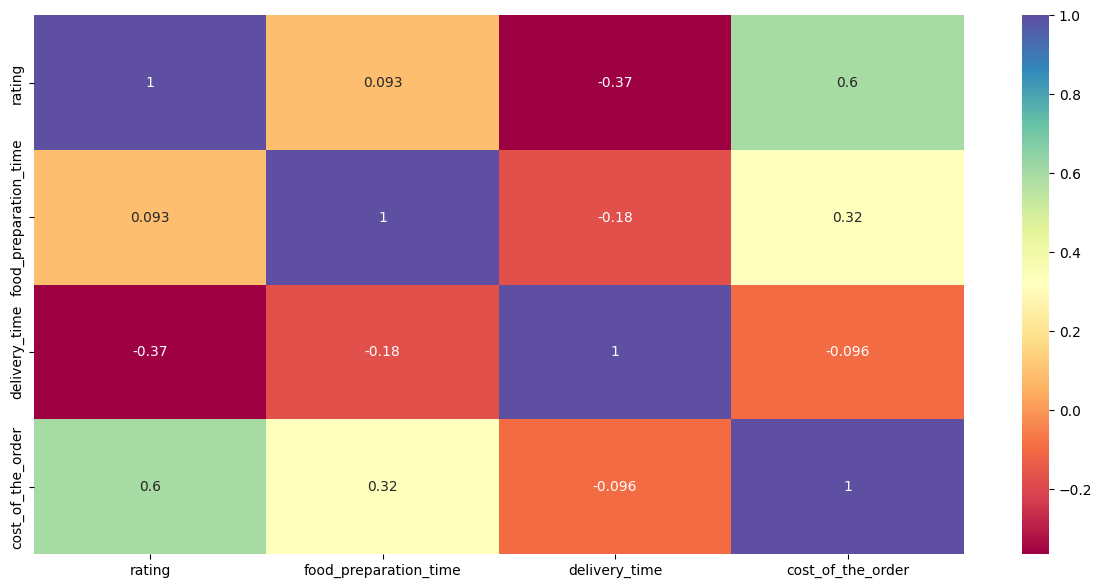

In [ ]:
correlationRating = gradeCuisineByRating.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlationRating, annot=True, cmap="Spectral");

- *The `tip` column is also slightly right-skewed.*
- *50% of the people pay less than 3 dollars as tip.*
- *Half of the tip amounts lie between 2 to 4 dollars.*

#### **Understanding the distribution of `size`**

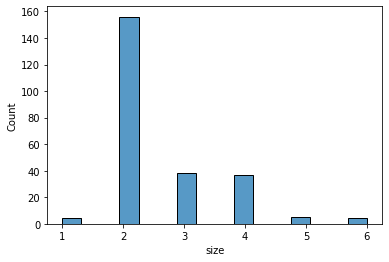

In [ ]:
sns.histplot(data=tips, x='size')

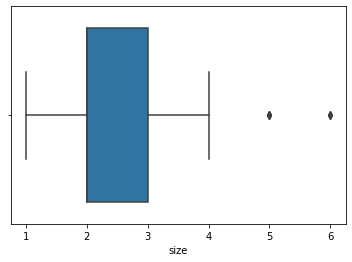

In [ ]:
sns.boxplot(data=tips, x="size")

- *Majority of the customers come in groups of 2 people (~160).*
- *50% of the groups have 2 to 3 people in them.*

### **We have now seen the distribution of the numerical columns. Let us now move on to the categorical columns and use the countplot to see their distribution.**

#### **Understanding the distribution of `day`**

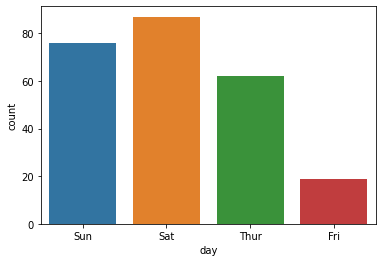

In [ ]:
sns.countplot(data=tips, x='day')

- *The number of orders is more during the weekends than the weekdays*.
- *The highest number of orders is received on Saturdays*

#### **Understanding the distribution of `time`**

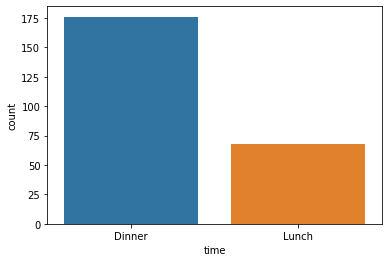

In [ ]:
sns.countplot(data=tips, x='time')

- *The restaurant receives more orders during dinner time as compared to lunch.*

#### **Understanding the distribution of `sex`**

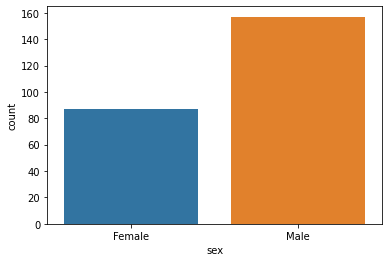

In [ ]:
sns.countplot(data=tips, x='sex')

- *The number of male bill payers is around 155 while the number of female bill payers is around 85.*

#### **Understanding the distribution of `smoker`**

<Axes: xlabel='cuisine_type', ylabel='count'>

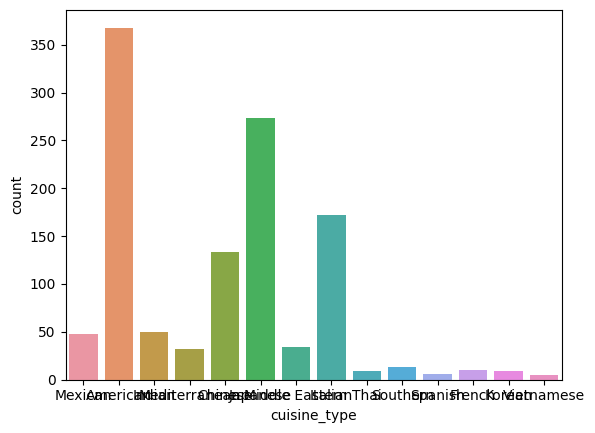

In [ ]:
sns.countplot(data=foodHubUpt, x='cuisine_type')

- *The tables which include non-smokers is more than those which included smokers.*

### **Till now we have seen the distribution of the columns individually. Let us now try to see the relation between various columns so that we can find some meaningful patterns and trends from them. Let us use the heatmap to see the correlation between the numerical columns.**

<ipython-input-44-ee138ed9f65c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=foodHub[['rating','cost_of_the_order','food_preparation_time','delivery_time','cuisine_type']].corr(), annot=True, cmap='YlGnBu');


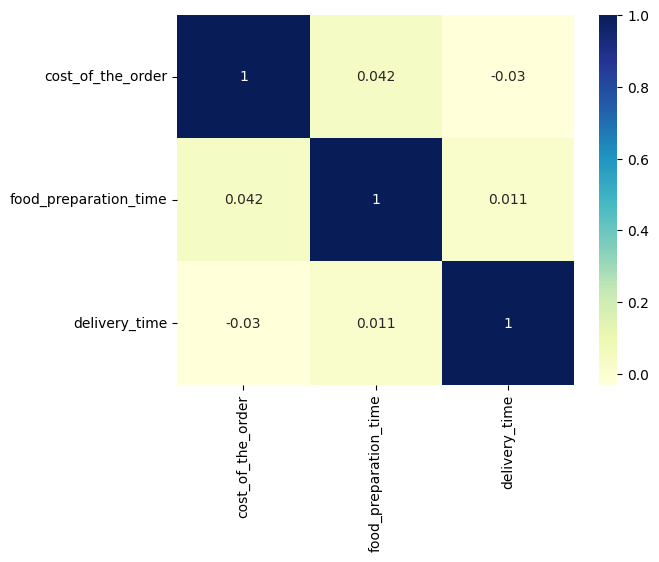

In [ ]:
sns.heatmap(data=foodHub[['rating','cost_of_the_order','food_preparation_time','delivery_time','cuisine_type']].corr(), annot=True, cmap='YlGnBu');

- *We can see that `total_bill` and `tip` columns are highly correlated with each other.*
- *The `total_bill` and `size` columns are also correlated with each other which makes sense since higher the group size, higher will be the bill amount and vice-versa*.
- *The `tip` and `size` columns are moderately related with each other.*

### **We have seen that `total_bill` and `tip` columns are highly correlated with each other. Let us verify this relationship with the help of various plots**

#### **Understanding the relationship between `total_bill` and `tip` using suitable plots**

In [ ]:
foodHubDup['totalTimeTaken'] = foodHubDup['food_preparation_time'] + foodHubDup['delivery_time']
foodHubDup.head()

<ipython-input-66-6f3b2d73a892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foodHubDup['totalTimeTaken'] = foodHubDup['food_preparation_time'] + foodHubDup['delivery_time']


,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,totalTimeTaken
2,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49
5,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24,44
7,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30,63


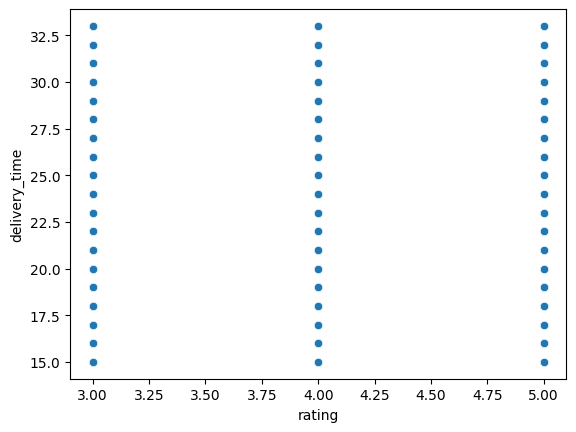

In [ ]:
#plt.figure(figsize= (1,5))
sns.scatterplot(data=foodHubDup, x='rating', y='delivery_time');
plt.show();

We can use the joinplot here to see the relationship between `total_bill` and `tip` as well as see their distribution, all combined in the same plot.

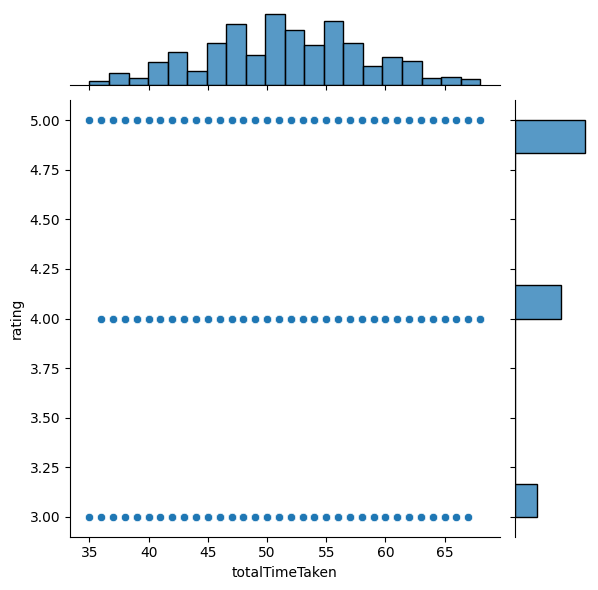

In [ ]:
sns.jointplot(data=foodHubDup, x='foodHubDup', y='rating');

Let us create a hexbin plot by setting **kind="hex"** to take care of the overlapping of points.

- Setting **kind="hex"** actually splits the plotting window into several hexagons and the colour of each hexagon denotes the number of data points in it.

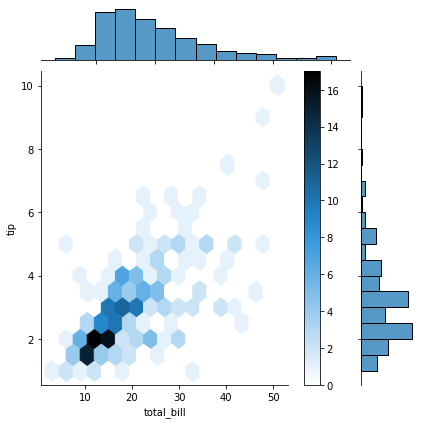

In [ ]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

- *There is a cluster of points in the region where the billing amount ranges from 8 to 16 dollars and the tip amount ranges from 1 to 2 dollars.*

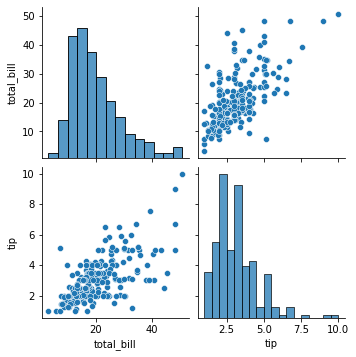

In [ ]:
sns.pairplot(data = tips[['total_bill','tip']])

- *From all the above graphs, it can be clearly seen that there is a linear relationship between `total_bill` and `tip` i.e higher the billing amount, higher is the tip amount and vice versa.*

### **Is the relationship between `total_bill` and `tip` valid with respect to the gender of the bill payer, smoking status, days and time at which the customer has visited the restaurant and also the group size?**

**`sex`**

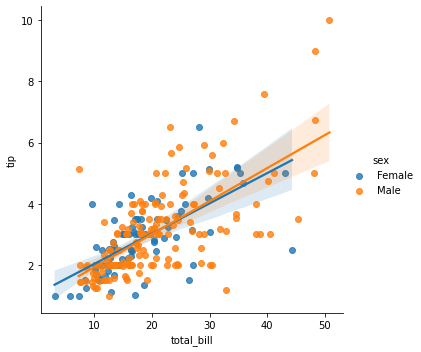

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue='sex')

- *The relationship between `total_bill` and `tip` is linear with respect to both the genders.*
- *There are some far away points where both the billing amount and tip amount are high and the bill payer is a male.*

**`smoker`**

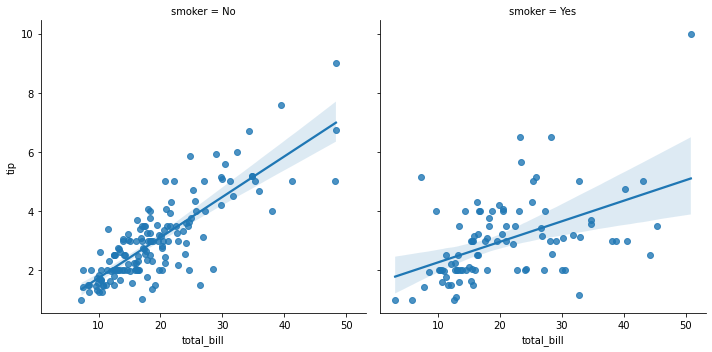

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'smoker')

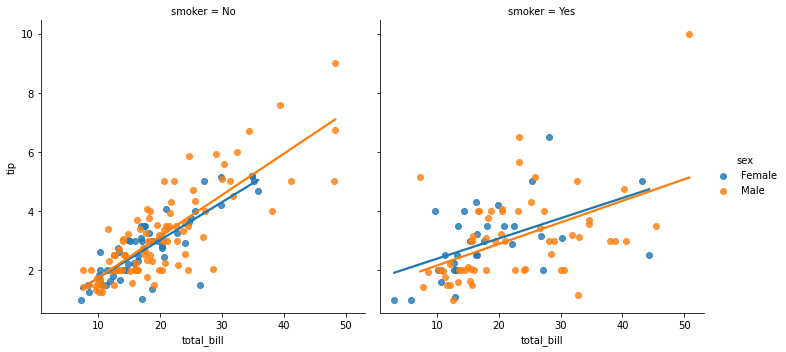

In [ ]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='smoker', ci=False)

- *Highest tip was given from a table which included smokers*
- *Non smokers show a more prominent linear relationship between total_bill and tip as compared to smokers*

**`day`**, **`time`**, and **`size`**

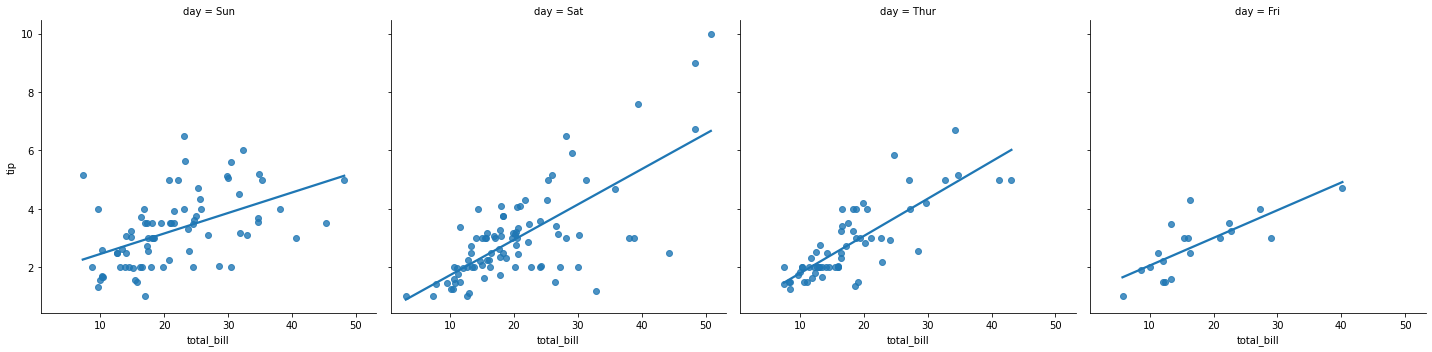

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'day', ci=False)

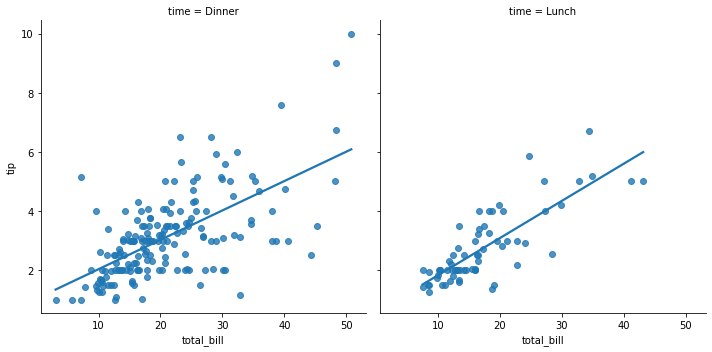

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'time', ci=False)

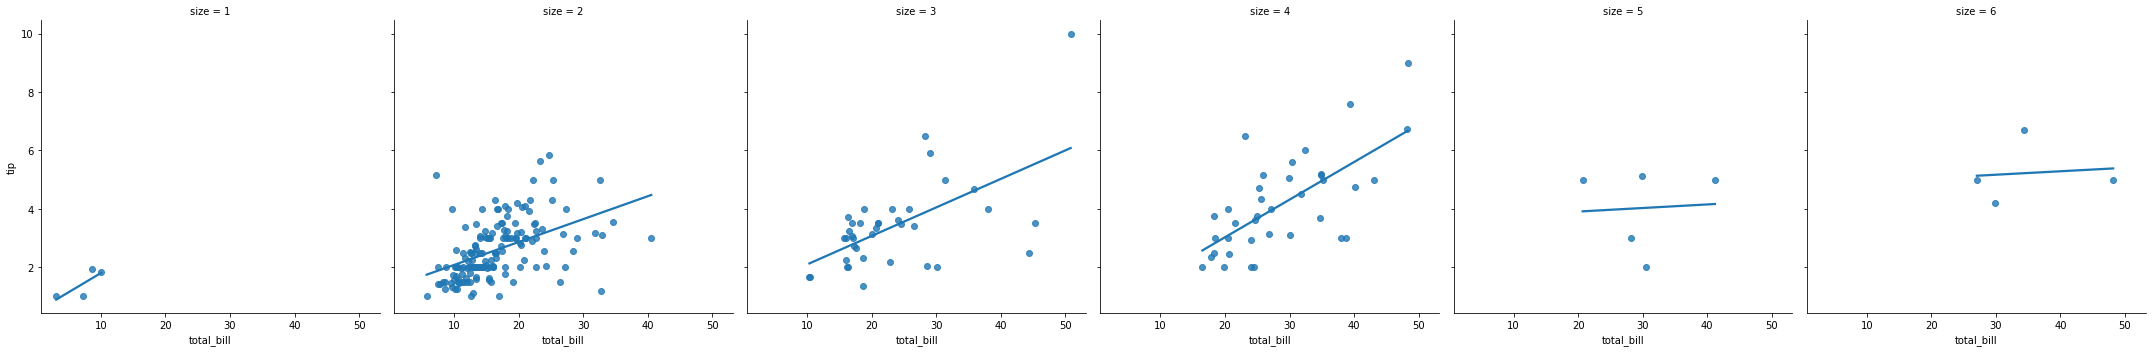

In [ ]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', col = 'size', ci=False)

- *The relationship between `total_bill` and `tip` is mostly linear with respect to day and time.*
- *However with respect to size of the group, this relationship gets constant as the size of the group increases.*

**We have seen earlier that customers visit Chef's Kitchen across different days of the week.**

### **How does the bill amount and tip vary with respect to the day of visit?**

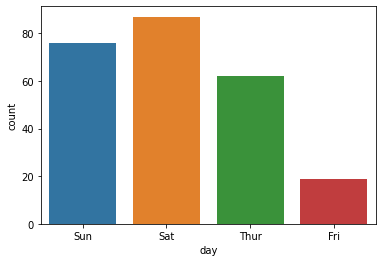

In [ ]:
sns.countplot(data=tips, x='day')

- *We can see that the number of orders is higher during the weekends as compared to the weekdays*

**`total_bill`**

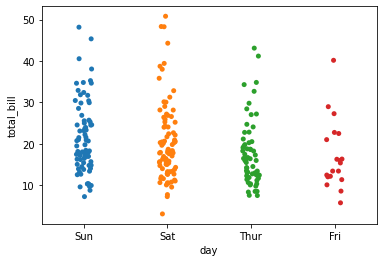

In [ ]:
sns.stripplot(data=tips,x='day',y='total_bill',jitter=True)
# Strip plots are more useful when we add random noise called "jitter" to avoid overlapping of data points with same values.

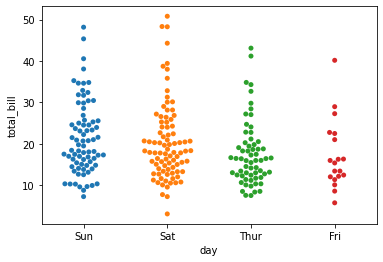

In [ ]:
sns.swarmplot(data=tips, x='day',y='total_bill')

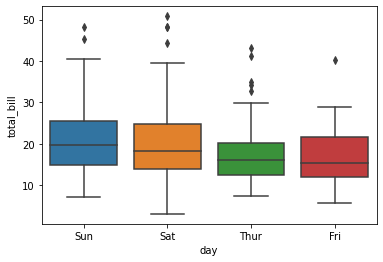

In [ ]:
sns.boxplot(data=tips, x='day', y='total_bill')

- *As we can see the number of orders is lower on Fridays as compared to the other days.*
- *The number of orders is higher on weekends as compared to the weekdays.*
- *The median billing amount on Saturdays and Sundays is higher than the other two days.*

**`tip`**

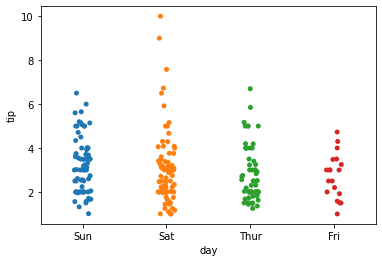

In [ ]:
sns.stripplot(data=tips,x='day',y='tip',jitter=True)
# Strip plots are more useful when we add random noise called "jitter" to avoid overlapping of data points with same values.

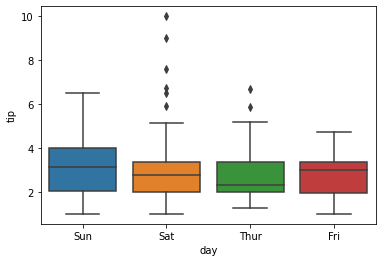

In [ ]:
sns.boxplot(data=tips, x='day', y='tip')

- *We can see that the median tip amount is almost equal during Friday, Saturday and Sunday and the median during these three days is higher as compared to Thursday*

**We have already seen that the number of orders at the restaurant tend to be higher during the dinner time as compared to lunch.**

### **Which time of the day brings in higher bill and tip amounts?**

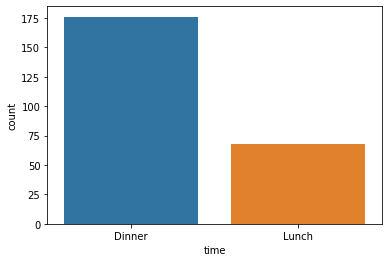

In [ ]:
sns.countplot(data=tips, x='time')

- *The number of orders during dinner is nearly 2.5 times the number of orders during lunch*.

**`total_bill`**

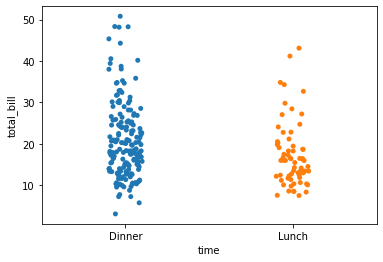

In [ ]:
sns.stripplot(data=tips,x='time',y='total_bill',jitter=True)
# Strip plots are more useful when we add random noise called "jitter" to avoid overlapping of data points with same values.

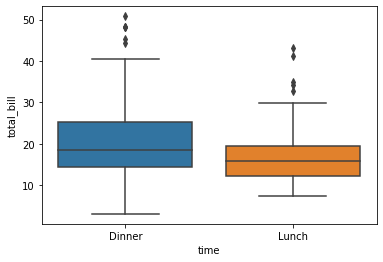

In [ ]:
sns.boxplot(data=tips, x='time', y='total_bill')

- *The order count is higher during the dinner time*
- *50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch*

**`tip`**

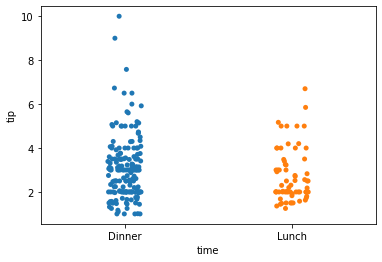

In [ ]:
sns.stripplot(data=tips,x='time',y='tip',jitter=True)
# Strip plots are more useful when we add random noise called "jitter" to avoid overlapping of data points with same values.

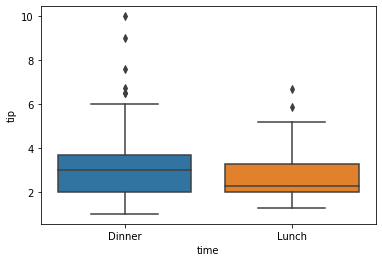

In [ ]:
sns.boxplot(data=tips, x='time', y='tip')

- *The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time.*

**After doing a thorough analysis of the `day` and `time` columns, let us now move on to the other two categorical colums, `sex` and `smoker`, and try to answer some important business questions.**

### **Ideally the tip amount should not vary with the gender of the bill payer. Is this assumption true with respect to the data provided? What is the count of male and female bill payers visiting each day?**


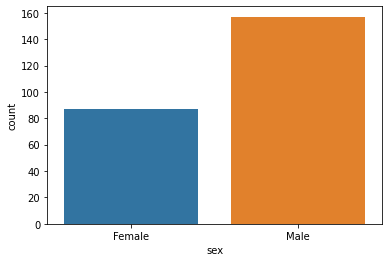

In [ ]:
sns.countplot(data=tips, x='sex')

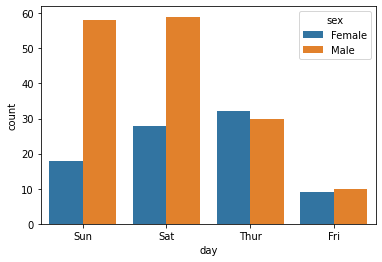

In [ ]:
sns.countplot(data=tips, x='day', hue='sex')

- *The number of male and female bill payers is around 160 and 80 respectively i.e the number of male bill payers is almost double as compared to the number of female bill payers*
- *On Saturdays and Sundays, the the number of male bill payers is significantly higher than the number of female bill payers.*

**Let us now see how the tip amount varies with respect to the gender of the bill payer**

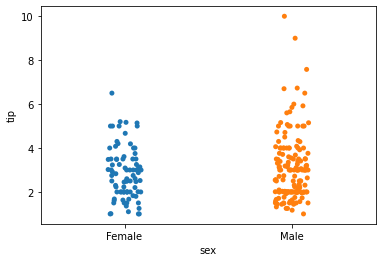

In [ ]:
sns.stripplot(data=tips, x='sex', y='tip')

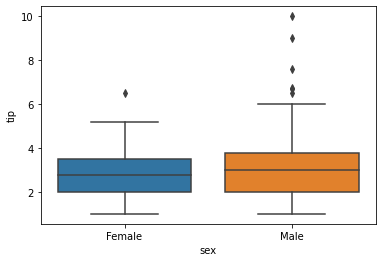

In [ ]:
sns.boxplot(data=tips, x='sex', y='tip')

- *The median value for `tip` is almost equal for both the genders.*
- *Males have a lot of outliers i.e far away values, giving higher tips.*

**Let us carry out a similar sort of analysis for `smoker` to know the distribution between the classes and see its relationship with `tip`.**

### **What is the distribution between smokers and non-smokers? Do they have any relationship with 'tip'?**


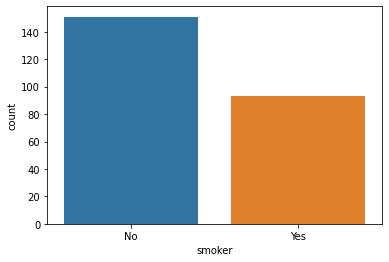

In [ ]:
sns.countplot(data=tips, x='smoker')

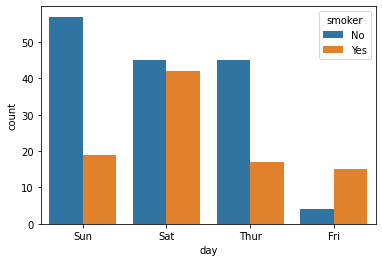

In [ ]:
sns.countplot(data=tips, x='day', hue='smoker')

- *The tables which included non-smokers is around 60 more than those which included smokers*
- *The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays*
- *Among all the four days, only on Fridays,the number of smokers is higher than the number of non-smokers*

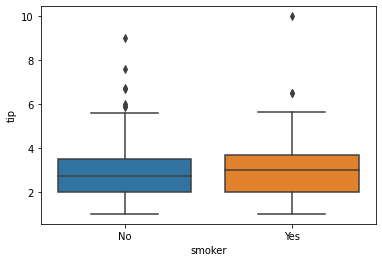

In [ ]:
sns.boxplot(data=tips, x='smoker', y='tip')

- *There is no relation between smoking status and tips, the median is almost the same in both the classes`*



### **Insights**

- *The bill amount ranges from around 3 dollars to 50 dollars while the average bill amount is around 20 dollars. Half of the bill amounts are less than 18 dollars.*
- *The tip amount ranges from around 1 dollar to 10 dollars. The mean and median of the tip amounts are very close to each other (~3 dollars).*
- *The group size varies from 1 person to 6 people.*
- *50%  of the people pay less than 20 dollars for overall bill and 50% of the people pay less than 3 dollars as tip.*
- *There is a linear relationship between `total_bill` and `tip` i.e higher the billing amount, higher is the tip amount and vice versa.*
- *The relationship between `total_bill` and `tip` is linear with respect to both the genders, day and time*
- *Non smokers show a more prominent linear relationship between total_bill and tip as compared to smokers*
- *With respect to size of the group, this relationship between `total_bill` and `tip` gets constant as the size of the group increases.*
- *The number of orders is higher on weekends as compared to the weekdays. The order count is higher during the dinner time as compared to lunch*
- *The median billing amount on Saturdays and Sundays is higher than the other two days.*
- *The median tip amount is almost equal during Friday, Saturday and Sunday and the median during these three days is higher as compared to Thursday*
- *50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch*
- *The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time.*
- *The number of male and female bill payers is around 160 and 80 respectively i.e the number of male bill payers is almost double as compared to the number of female bill payers*
- *On Saturdays and Sundays, the number of male bill payers is significantly higher than the number of female bill payers.*
- *The median value for `tip` is almost equal for both the genders.*
- *Males have a lot of outliers i.e far away values, giving higher tips.*
- *The tables which included non-smokers is around 60 more than those which included smokers*
- *The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays*
- *Among all the four days, only on Fridays,the number of smokers is higher than the number of non-smokers*
- *There is no relation between smoking status and tips, the median is almost the same in both the classes*